<h1 style="color:rgb(0,120,170)">Hands-On AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 1 (Assignment) -- Reading, handling, visualization of datasets</h2>

Authors: Brandstetter, Ramsauer, Rumetshofer, Schäfl <br>
Date: 18-10-2019

This file is part of the "Hands-On AI I" lecture material. The following copyright statement applies 
to all code within this file.

<b>Copyright statement:</b> <br>
This  material,  no  matter  whether  in  printed  or  electronic  form,  may  be  used  for personal  and non-commercial educational use only.  Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

# Exercise 0
Before tackling all those exciting tasks of this notebook, the neccessary Python modules need to be loaded. Have a look at the notebook discussed during the lecture, and import the following modules:

- <code>u1_utils</code>
- <code>IPython.display</code>
- <code>numpy</code>
- <code>PIL.Image</code>

In [1]:
import u1_utils as u1
import IPython.display as ipd
import numpy as np
from PIL import Image

Afterwards, check if the <code>numpy</code> module was correctly imported, by computed the <i>minimum</i> of <code>[4, 2, 6]</code> and printing the result.

In [2]:
arg = [4, 2, 6]
minm = np.amin(arg)
print(minm)

2


# Exercise 1
In this exercise you will be working with a data set composed of low-resolution images of handwritten <i>digits</i>. This data set has 10 classes in total, whereas each corresponds to a digit ranging from 0 to 9. It was originally created by the <i>National Institute of Standards and Technology (NIST)</i> and processed later on, in order to get a more easier-to-handle data set. For curious minds, more information regarding this data set can be found at:

<cite>M. D. Garris, J. L. Blue, G. T. Candela, D. L. Dimmick, J. Geist, P. J. Grother, S. A. Janet, and C. L. Wilson, NIST Form-Based Handprint Recognition System, NISTIR 5469, 1994.</cite>

Your <b>first task</b> of this exercise is to get more familiar with this data set. In order to achieve this, perform the following steps:

- Load the <i>digits</i> data set (<i>hint:</i> have a look at the provided utilities file).
- Print a <i>list</i> comprising the <i>keys</i> of the data set.
- Compute and print the amount of <i>samples</i> in the data set.


- ... and follow any further instructions.

In [3]:
digits = u1.load_digits()  #?? has to be replaced with your solution
print(list(digits.keys()))
print('{}'.format(len(digits[r"data"])), 'samples')

['data', 'target', 'target_names', 'images', 'DESCR']
1797 samples


Additionally, it is always a good idea to directly look at the data (if applicable) in order to get more insight. For this very purpose, plot the first <i>nine</i> digits and try to identifiy the corresponding labels (without looking at the <code>target</code> key).

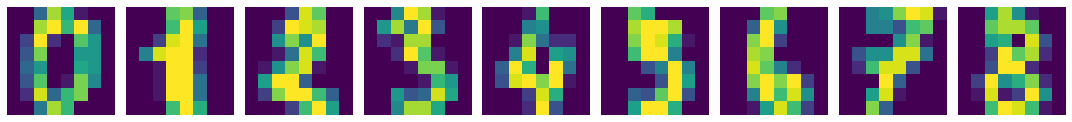

In [4]:
u1.plot_digit_images([digits.images[i] for i in range(9)])  #?? has to be replaced with your solution

Pictures are nice and all, especially to get a brief overview of the data, but they hide some very important detail in this case: what are the <i>features</i> of the current digit data set? They are not so easy to spot at a first glance, to the contrary of the iris data set of the lecture.

Maybe <i>displaying</i> the digits in a pretty table helps?

In [5]:
u1.display_digits_pretty_table(digits)

Px. 0  Px. 1  Px. 2  Px. 3  Px. 4  Px. 5  Px. 6  Px. 7  Px. 8  Px. 9  \
0       0.0    0.0    5.0   13.0    9.0    1.0    0.0    0.0    0.0    0.0   
1       0.0    0.0    0.0   12.0   13.0    5.0    0.0    0.0    0.0    0.0   
2       0.0    0.0    0.0    4.0   15.0   12.0    0.0    0.0    0.0    0.0   
3       0.0    0.0    7.0   15.0   13.0    1.0    0.0    0.0    0.0    8.0   
4       0.0    0.0    0.0    1.0   11.0    0.0    0.0    0.0    0.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1792    0.0    0.0    4.0   10.0   13.0    6.0    0.0    0.0    0.0    1.0   
1793    0.0    0.0    6.0   16.0   13.0   11.0    1.0    0.0    0.0    0.0   
1794    0.0    0.0    1.0   11.0   15.0    1.0    0.0    0.0    0.0    0.0   
1795    0.0    0.0    2.0   10.0    7.0    0.0    0.0    0.0    0.0    0.0   
1796    0.0    0.0   10.0   14.0    8.0    1.0    0.0    0.0    0.0    2.0   

      ...  Px. 55  Px. 56  Px. 57  Px. 58  Px. 59  Px. 60  Px. 61  Px. 62  \
0     ...     0.0     0.0     0.0     6.0    13.0    10.0     0.0     0.0   
1     ...     0.0     0.0     0.0     0.0    11.0    16.0    10.0     0.0   
2     ...     0.0     0.0     0.0     0.0     3.0    11.0    16.0     9.0   
3     ...     0.0     0.0     0.0     7.0    13.0    13.0     9.0     0.0   
4     ...     0.0     0.0     0.0     0.0     2.0    16.0     4.0     0.0   
...   ...     ...     ...     ...     ...     ...     ...     ...     ...   
1792  ...     0.0     0.0     0.0     2.0    14.0    15.0     9.0     0.0   
1793  ...     0.0     0.0     0.0     6.0    16.0    14.0     6.0     0.0   
1794  ...     0.0     0.0     0.0     2.0     9.0    13.0     6.0     0.0   
1795  ...     0.0     0.0     0.0     5.0    12.0    16.0    12.0     0.0   
1796  ...     0.0     0.0     1.0     8.0    12.0    14.0    12.0     1.0   

      Px. 63  Digit  
0        0.0      0  
1        0.0      1  
2        0.0      2  
3        0.0      3  
4        0.0      4  
...      ...    ...  
1792     0.0      9  
1793     0.0      0  
1794     0.0      8  
1795     0.0      9  
1796     0.0      8  

[1797 rows x 65 columns]

Now as we are more familiar with the data set, we want to compute the <i>principal components</i> in order to apply a dimensionality reduction. Otherwise plotting and comparing more than <i>two</i> features would be a bit of a hassle. Your <b>second task</b> comprises:
- Apply <i>PCA</i> and project the digit data set down to <i>two</i> components.
- Display the resulting data in a colored <i>scatter plot</i>.

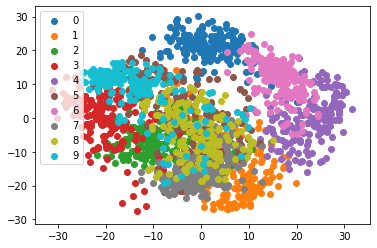

In [6]:
digits_reduced_pca = u1.apply_PCA(n_components=2, data=digits.data)
u1.plot_points_2d_color(digits_reduced_pca, digits)

As stated in the lecture, different projection methods may lead to different results. Sometimes one method delivers a superior solution in contrast to others.
- Reduce the digit data set using <i>tSNE</i> to $d=2$.
- Display the resulting data in a colored <i>scatter plot</i>.
- Discuss any differences between the plots of <i>PCA</i> and <i>tSNE</i>.

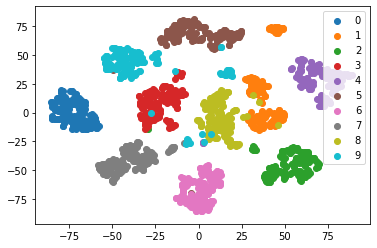

In [7]:
digits_reduced_tsne = u1.apply_tSNE(n_components=2, perplexity=10, data=digits.data)
u1.plot_points_2d_color(digits_reduced_tsne, digits)

# Answer
### Discussion of the differences between the plots

- in the tSNE plot the different clusters are much better visible than they are in the PCA plot
- the x-axis and the y-axis of the PCA plot both have a smaller range than in the tSNE plot (<b>PCA</b>: x-axis and y-axis [-30;30]; <b>tSNE</b>: x-axis [-80;80], y-axis [-75;75]) (which could be the cause of the better visibility of the clusters in the tSNE plot)
- it appears that in the PCA plot the clusters are not that well distinguishable from one another like in the tSNE plot, they are more mixed up

The <b>third</b> and <b>last task</b> of this exericse is to pretend, that it is <i>not</i> known, how many different digits the data set is comprised of. Apply <i>$k$-Means Clustering</i> with different values for $k$ as well as <i>Affinity Propagation</i>. Shortly discuss the different behaviors of both algorithms as well as their results. What do you observe?

In [8]:
kmeans1 = u1.apply_k_means(k=10, data=digits.data)
kmeans2 = u1.apply_k_means(k=5, data=digits.data)
kmeans3 = u1.apply_k_means(k=2, data=digits.data)
kmeans4 = u1.apply_k_means(k=20, data=digits.data)

In [9]:
aff = u1.apply_affinity_prop(data=digits.data)
print("Assigned clusters: " +  str(u1.num_targets(aff)))

Assigned clusters: 103


# Answer
### Discussion of the behavior of k-Means Clustering and Affinity Propagation

The k-Means Clustering method seems to be a method which becomes handy if an approximate number of different clusters is already known. With setting the value of k, one can determine for how many clusters the algorithm should search for. So if the value was set to e.g. 10, the algorithm assumes that there are 10 different clusters and tries to separate the data accordingly. 

The Affinity Propagation method seems to be useful if no such approximation is present and one has no idea about the number of different clusters. The algorithm tries to find out how many clusters there are. Unfortunately, in our example Affinity Propagation gives a really bad approximation of this number: There are 103 assigned clusters, but only 10 real clusters (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10).

# Exercise 2
In this exercise, you will be experimenting with a picture of our research dog <i>Charlie</i> (don't worry, he is fine with that). As always, try to get familiar with the data you're working with. To be more precise, as the <b>first task</b>, perform the following actions:
- Load a picture of Charlie (use <code>charlie_1.jpg</code>).
- Visualise Charlie in his original state.
- Print the shape of the loaded image and describe the parts.

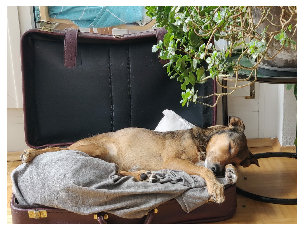

Shape of Charlie: (1200, 1599, 3)


In [10]:
image_path = 'resources/charlie_1.jpg'
with Image.open(image_path) as image_data:
    image_charlie = np.array(image_data)
u1.plot_image(image_path)
print('Shape of Charlie: {}'.format(image_charlie.shape))

Remember, what the three characters <i>R</i>, <i>G</i> and <i>B</i> stand for in <i>RGB</i>, and visualize them accordingly.

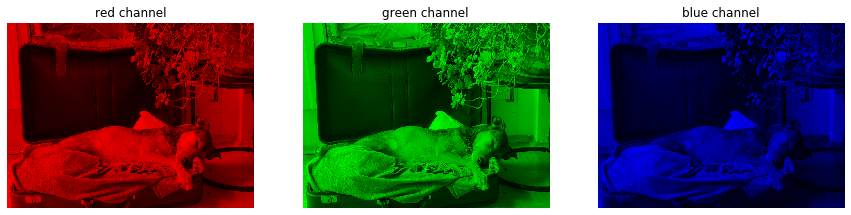

In [11]:
# R = Red
# G = Green
# B = Blue

u1.plot_image_channels_rgb(image_path)

Additionally, think about a variant of this color model, which incorporates a fourth part describing the <i>transparency</i> of the image. Set the <i>alpha channel</i> to be the ratio $\frac{height}{width}$ of the image.

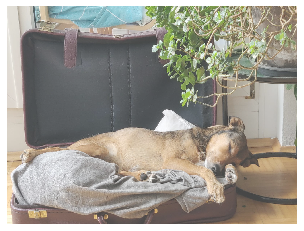

In [12]:
u1.plot_image_rgba(image_path, alpha=1200/1599)

Moreover, display a more nostalgic version of Charlies image by transforming it to <i>grayscale</i>.

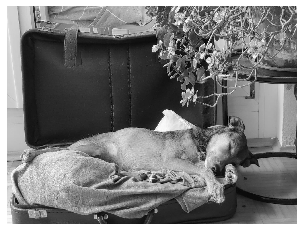

In [13]:
u1.plot_image_grayscale(image_path)

As your <b>second task</b>, you will have to produce more images of Charlie, all modified in a slightly different way:
- Rotate the image in a way, so that <i>width</i> and <i>height</i> are exchanged with each other.
- Charlie wants to lie on his right side, for a change. Can you help him?
- Sometimes, the world seems to be upside down. Reflect this on Charlies image.
- There is a lot of background in the image, try to get rid of it by <i>cropping</i>.
- Blur the image in a way, so that the details of the leaves are barely visible.

<i>Please keep in mind, to create an own notebook cell for each of this variations. Otherwise, the modifications will blend into each other!</i>

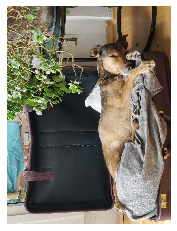

In [14]:
u1.rotate_image(image_path, angle=90)

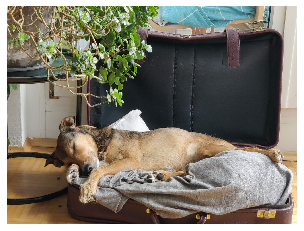

In [15]:
u1.flip_image(image_path, type='horizontal')

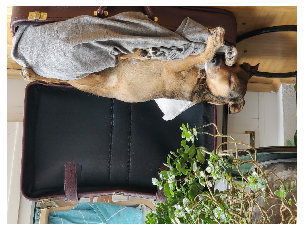

In [16]:
u1.flip_image(image_path, type='vertical')

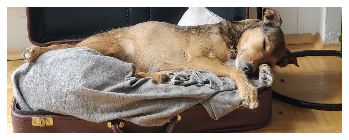

In [17]:
u1.crop_image(image_path, left=0, top=600, width=1599, height=600)

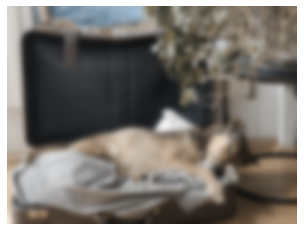

In [18]:
u1.blur_image(image_path, sigma=15)

Again, remember the meaning of <i>RGB</i> and plot the corresponding histogram. Which kind of information can you gather from the visualization?

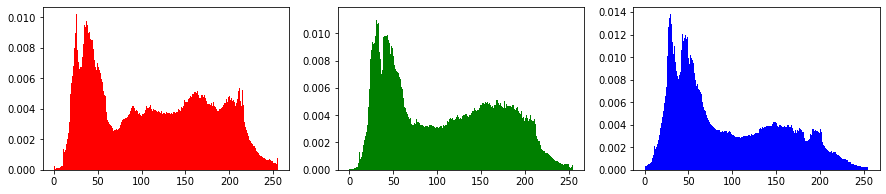

In [19]:
u1.plot_histogram(image_path)

# Answer
Such a histogram shows the "occurance of individual color values of an image". So it is possible to see how often a particular "strength" of each of the three colors occure.

Using previous visualizations, we want to segment Charlies image. As your <b>third</b> and <b>last task</b> of this exercise, perform the following steps:
- Cut of the peak of the <i>first</i> histogram.
- Cut of the peak of the <i>second</i> histogram.
- Cut of the peak of the <i>last</i> histogram.
- Cut of the peak of <i>all</i> histograms.

<i>Please keep in mind, to create an own notebook cell for each of this variations. Otherwise, the modifications will blend into each other!</i>

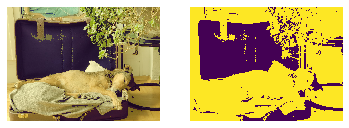

In [20]:
u1.segment(image_path, ">60", ">0", ">0")

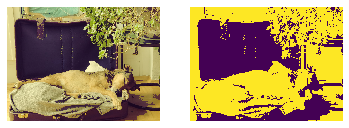

In [21]:
u1.segment(image_path, ">0", ">75", ">0")

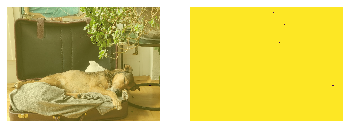

In [22]:
u1.segment(image_path, ">0", ">0", ">80")

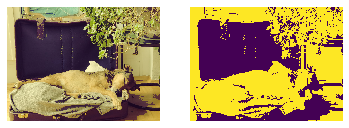

In [23]:
u1.segment(image_path, ">60", ">75", ">80")

# Exercise 3
The last exercise of this assignment is about sequence data, more precisely, <i>audio data</i>. The sample of our choice is a short <i>piano</i> composition, which will be modified by adding various sine-like signals, as well as analysed by visualizing different characteristics.

To get started with your <b>first task</b> of this exercise, perform the following steps:
- Load the first $T=20$ seconds of the piano composition (use <code>piano.wav</code>).
- Plot the corresponding audio signal.
- Plot the <i>sampling rate</i> of the signal.

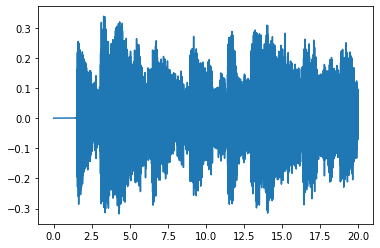

Sampling rate: 44100Hz


In [24]:
audio_path = r'resources/piano.wav'
duration = 20
audio_signal, sampling_rate = u1.read_wav_file(audio_path, t=duration)
u1.plot_wave(audio_signal, duration, sampling_rate)
print('Sampling rate: {}Hz'.format(sampling_rate))

As always when working with newly gathered data, get familiar with it. In case of audio signals, listen to them.
- Create a separate <code>Audio</code> object.
- Keep in mind, to set the <i>sampling rate</i> appropriately.

In [25]:
ipd.Audio(audio_signal,rate=sampling_rate)

Before applying any modifications to the audio signal, perform the following analysis as the <b>second task</b>:
- Perform a <i>Fourier transform</i>.
- Display the resulting frequency spectrum (cut off at $1\,000\ Hz$).

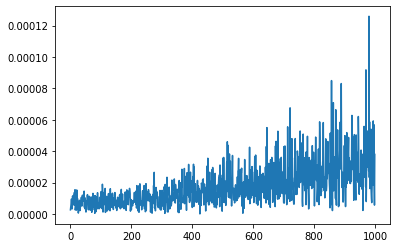

In [26]:
fx, fx_pow = u1.apply_fourier_trans(audio_signal)
u1.plot(fx_pow[0:1000])

The frequency spectrum is not the only type of visualization, which is often used to analyse audio data. The <i>spectrogram</i>, on the other hand, preserves information about <i>time</i>, which furthe helps, to get more insight into the data.
- Display the corresponding <i>spectrogram</i> and omit the first <i>two</i> seconds.
- Experiment with different <i>window sizes</i> (at least <i>three</i> between $16\,384$ and $256$).

What do you observe?

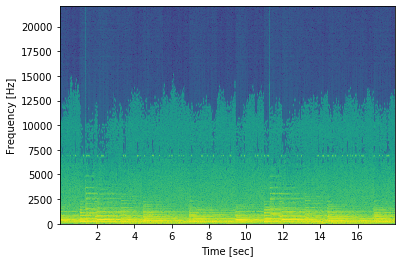

In [27]:
u1.plot_spec(audio_signal[88200:], 1048, sampling_rate)

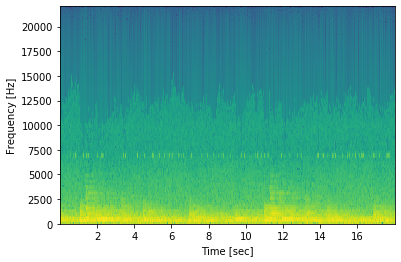

In [28]:
u1.plot_spec(audio_signal[88200:], 256, sampling_rate)

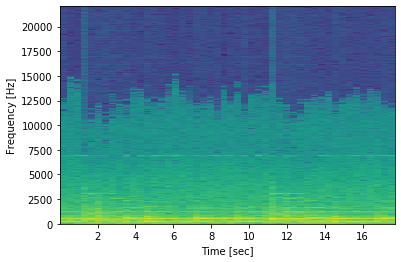

In [29]:
u1.plot_spec(audio_signal[88200:], 16384, sampling_rate)

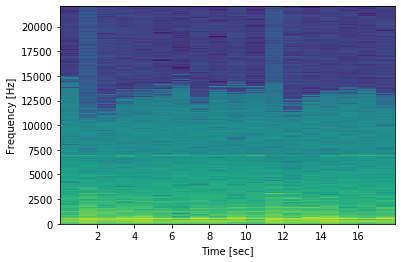

In [30]:
u1.plot_spec(audio_signal[88200:], 44100, sampling_rate)

# Answer

The window sizes determines in which intervals a new spectrum will be computed. The number of samples serves as the unit of these intervals. E.g. if the window size equals 44100, then every 44100th sample (or, because this equals the sample rate, every second) a new spectrum is shown. If the window size is 256 then every 256th sample a new spectrum will be shown. Therefore, a spectogram with a high window size (e.g. 44100) is relatively rough (I mean "grob", I hope this is the right english term) and unprecise while a spectogram with a low window size is more fine (I mean "fein", I hope this is the right english term) and precise.

The <b>third</b> and <b>last task</b> of this exercise as well as assignment, is to create artificial <i>sine-like</i> waves and add them to our piano sample. Keep in mind to use the same <i>sampling rate</i> as well as the same <i>duration</i> as the piano sample.
- Create wave signal with $f = 150\ Hz$ and set the <i>first ten</i> seconds to $0\ Hz$.
- Create wave signal with $f = 232\ Hz$ and set the <i>last ten</i> seconds to $0\ Hz$.
- Add both to the piano sample and listen to the result.

In [31]:
#?? has to be replaced with your solution
wave_one = u1.generate_wave(150, audio_signal.shape[0] / sampling_rate, sampling_rate)
wave_two = u1.generate_wave(232, audio_signal.shape[0] / sampling_rate, sampling_rate)
wave_one[:10 * sampling_rate] = 0
wave_two[wave_two.shape[0]  - (10 * sampling_rate):] = 0
modified_signal = wave_one + wave_two + audio_signal
ipd.Audio(modified_signal, rate=sampling_rate)

Last but not least, again analyse the <i>newly</i> created audio signal:
- Perform a <i>Fourier transform</i>.
- Display the resulting frequency spectrum (cut off at $1\,000\ Hz$).

Do you see any difference to the frequency spectrum of the <i>original</i> piano signal?

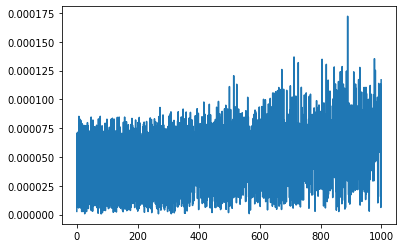

In [32]:
fx, fx_pow = u1.apply_fourier_trans(modified_signal)
u1.plot(fx_pow[0:1000])

# Answer

The new spectrum is much wider (I mean "breiter") than the original piano spectrum. The peaks are at the same places, but some are greater than they were before (e.g. the peak between 800 and 1000).

Now we want to have an analysis of the <i>modified</i> signal which preserves information about <i>time</i>:
- Display the corresponding <i>spectrogram</i> and omit the first <i>two</i> seconds.
- Experiment with different <i>window sizes</i> (at least <i>three</i> between $16\,384$ and $256$).

What do you observe? Can you see any difference to the spectrogram of the <i>original</i> piano signal?

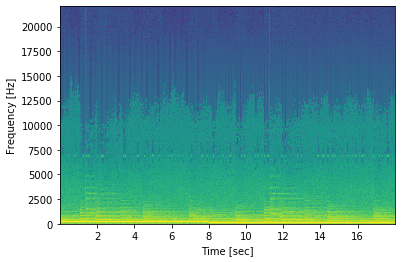

In [33]:
u1.plot_spec(modified_signal[88200:], 1048, sampling_rate)

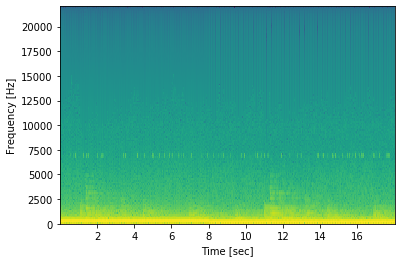

In [34]:
u1.plot_spec(modified_signal[88200:], 256, sampling_rate)

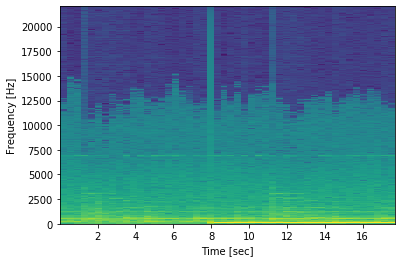

In [35]:
u1.plot_spec(modified_signal[88200:], 16384, sampling_rate)

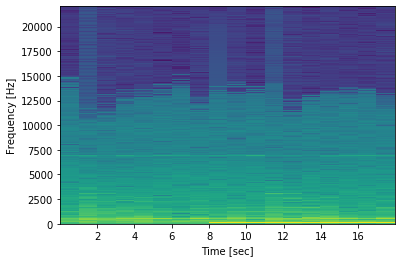

In [36]:
u1.plot_spec(modified_signal[88200:], 44100, sampling_rate)

# Answer

There is almost no difference between the new and the old spectograms. Here and there little changes are visible like e.g. the lower yellow parts of the old spectograms are a little bit richer than those of the new spectograms. Moreover in the new spectogram with the window size of 256 the different color-tones of the spectrums are not that well distinguishable than they are in the original spectrogram with the window size of 256.